In [2]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.7 MB/s eta 0:00:00


Class Distribution Before Synthesis:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

Class Distribution After Synthesis:
fetal_health
1.0    1655
3.0    1479
2.0    1360
Name: count, dtype: int64


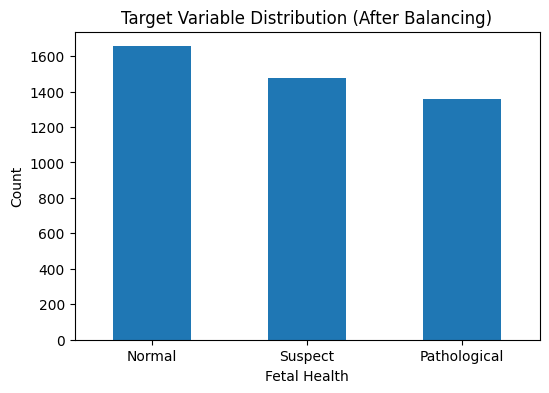

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ctgan import CTGAN
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("/content/fetal_health.csv")

# Separate features and target variable
X = df.drop(columns=["fetal_health"])
y = df["fetal_health"]

# Combine features and target variable into one DataFrame
df_combined = pd.concat([X, y], axis=1)

# Check the class distribution
print("Class Distribution Before Synthesis:")
print(df['fetal_health'].value_counts())

# Separate classes
normal_df = df_combined[df_combined['fetal_health'] == 1]
suspect_df = df_combined[df_combined['fetal_health'] == 2]
pathological_df = df_combined[df_combined['fetal_health'] == 3]

# Initialize CTGAN
ctgan = CTGAN()

# Generate synthetic data for Suspect class
ctgan.fit(suspect_df.drop(columns=["fetal_health"]))
suspect_synthetic = ctgan.sample(n=len(normal_df) - len(suspect_df))
suspect_synthetic["fetal_health"] = 2  # Add the target column

# Generate synthetic data for Pathological class
ctgan.fit(pathological_df.drop(columns=["fetal_health"]))
pathological_synthetic = ctgan.sample(n=len(normal_df) - len(pathological_df))
pathological_synthetic["fetal_health"] = 3  # Add the target column

# Combine original and synthetic data
balanced_df = pd.concat([normal_df, suspect_synthetic, pathological_synthetic])

# Shuffle the dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the class distribution after balancing
print("\nClass Distribution After Synthesis:")
print(balanced_df['fetal_health'].value_counts())

# Save the dataset
balanced_df.to_csv("111balanced_fetal_health_dataset.csv", index=False)

# Plot the new distribution
plt.figure(figsize=(6, 4))
balanced_df['fetal_health'].value_counts().plot(kind='bar')
plt.title('Target Variable Distribution (After Balancing)')
plt.xlabel('Fetal Health')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'Suspect', 'Pathological'], rotation=0)
plt.show()
